# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
# from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
np.random.seed(11)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [4]:
cities

['new norfolk',
 'rikitea',
 'saleaula',
 'port hawkesbury',
 'alyangula',
 'puerto ayora',
 'punta arenas',
 'hithadhoo',
 'barrow',
 'cheuskiny',
 'areosa',
 'mar del plata',
 'saskylakh',
 'tasiilaq',
 'cape town',
 'cabanas',
 'albany',
 'geraldton',
 'mataura',
 'rabo de peixe',
 'boddam',
 'luderitz',
 'ahipara',
 'port alfred',
 'hami',
 'ponta do sol',
 'ushuaia',
 'faanui',
 'bengkulu',
 'pangnirtung',
 'tamayo',
 'mabaruma',
 'cherskiy',
 'belushya guba',
 'port augusta',
 'arraial do cabo',
 'khuzhir',
 'bluff',
 'kruisfontein',
 'laguna',
 'yarovoye',
 'clyde river',
 'osinki',
 'kavaratti',
 'hilo',
 'inhambane',
 'hermanus',
 'gurupi',
 'eureka',
 'busselton',
 'dingle',
 'murray bridge',
 'roanoke rapids',
 'hohhot',
 'norman wells',
 'marcona',
 'yerofey pavlovich',
 'dormidontovka',
 'los llanos de aridane',
 'saint anthony',
 'bantou',
 'illoqqortoormiut',
 'babusnica',
 'longyearbyen',
 'carnarvon',
 'paradwip',
 'isangel',
 'ayagoz',
 'jamestown',
 'atar',
 'bethel'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="

city_name = []
city_temp_max = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
city_lat = []
city_lng = []

counter = 0
set = 1

for city in cities:
    query_url = f"{url}{weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    
    try:
             
        name = response["name"]
        city_name.append(name)
            
        temp = response["main"]["temp_max"]
        city_temp_max.append(temp)
    
        humidity = response["main"]["humidity"]
        city_humidity.append(humidity)
        
        clouds = response["clouds"]["all"]
        city_clouds.append(clouds)
        
        wind = response["wind"]["speed"]
        city_wind.append(wind)
        
        country = response["sys"]["country"]
        city_country.append(country)
        
        date = response["dt"]
        city_date.append(date)
        
        lat = response["coord"]["lat"]
        city_lat.append(lat)
        
        lng = response["coord"]["lon"]
        city_lng.append(lng)
        
        if counter > 49:
            counter = 1
            set += 1
            
        else:
            counter += 1
        
        print(f"Processing Record {counter} of Set {set} | {city}")

    except:
        print("City not found. Skipping...")

print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | rikitea
City not found. Skipping...
Processing Record 3 of Set 1 | port hawkesbury
Processing Record 4 of Set 1 | alyangula
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | barrow
City not found. Skipping...
Processing Record 9 of Set 1 | areosa
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | cabanas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | rabo de peixe
Processing Record 19 of Set 1 | boddam
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set

City not found. Skipping...
Processing Record 38 of Set 4 | ulaanbaatar
Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | lexington park
Processing Record 42 of Set 4 | jagtial
Processing Record 43 of Set 4 | boma
City not found. Skipping...
Processing Record 44 of Set 4 | bayangol
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | vastseliina
Processing Record 47 of Set 4 | ouro preto do oeste
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | saint-georges
City not found. Skipping...
Processing Record 50 of Set 4 | aitape
Processing Record 1 of Set 5 | usoke
City not found. Skipping...
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | valdivia
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | nelson bay
Processing Record 6 of Set 5 | umm kaddadah
City not found. Skipping..

Processing Record 24 of Set 8 | ugoofaaru
Processing Record 25 of Set 8 | banjar
Processing Record 26 of Set 8 | cacador
Processing Record 27 of Set 8 | belmonte
Processing Record 28 of Set 8 | uva
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | porirua
Processing Record 31 of Set 8 | antofagasta
Processing Record 32 of Set 8 | coari
Processing Record 33 of Set 8 | sandwick
Processing Record 34 of Set 8 | grimshaw
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | sangin
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | wawa
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | ambon
Processing Record 42 of Set 8 | nyurba
Processing Record 43 of Set 8 | mabopane
Processing Record 44 of Set 8 | yining
Processing Record 45 of Set 8 | saint-marc
Processing Record 46 of Set 8 | igrim
Processing Record 47 of Set 8 | chernaya kholunitsa
Processing Record

Processing Record 18 of Set 12 | kibungo
----------------------------------
Data Retrieval Complete
----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({"City": city_name, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_temp_max,
                          "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind,
                          "Country": city_country, "Date": city_date})

weather_df.to_csv("output_data/cities.csv", encoding="utf-8", index=False, header=True)

In [7]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,54.72,82,36,1.01,AU,1624067686
1,Rikitea,-23.1203,-134.9692,74.84,77,8,23.78,PF,1624067580
2,Port Hawkesbury,45.6169,-61.3485,64.35,79,77,1.01,CA,1624067688
3,Alyangula,-13.8483,136.4192,76.87,57,100,11.50,AU,1624067688
4,Puerto Ayora,-0.7393,-90.3518,72.55,96,47,4.00,EC,1624067587
...,...,...,...,...,...,...,...,...,...
563,Solnechnyy,50.7214,136.6319,65.89,53,100,8.03,RU,1624068093
564,Wanning,18.8003,110.3967,89.53,61,14,11.99,CN,1624067967
565,Oussouye,12.4850,-16.5469,77.70,79,49,6.53,SN,1624068094
566,Baruun-Urt,46.6806,113.2792,56.61,57,96,18.34,MN,1624068095


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_check = weather_df.loc[weather_df["Humidity"] > 100, :]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Confirming the highest humidity value in the data is 100.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.564477,19.901909,67.553521,70.091549,54.751761,7.248398,1.624068e+09
std,33.602829,89.234021,14.292901,20.819254,40.755562,4.934849,1.289844e+02
min,-54.800000,-175.200000,24.750000,8.000000,0.000000,0.000000,1.624067e+09
25%,-8.711950,-57.584800,57.285000,59.000000,10.000000,3.400000,1.624068e+09
50%,22.655800,26.710450,68.470000,75.000000,62.000000,6.345000,1.624068e+09
75%,48.795100,100.446375,78.580000,86.000000,99.000000,10.270000,1.624068e+09
max,78.218600,179.316700,109.310000,100.000000,100.000000,24.140000,1.624068e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

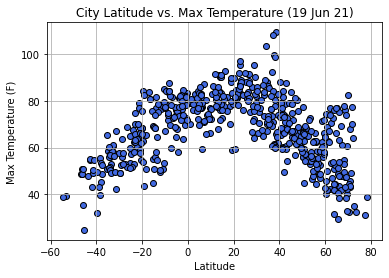

In [10]:
x_data = weather_df["Lat"]
temp_data = weather_df["Max Temp"]

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (19 Jun 21)")
plt.grid()
plt.scatter(x_data, temp_data, marker="o", facecolor="royalblue", edgecolor="black")
plt.savefig("output_data/lat_temp.png", bbox_inches='tight');
plt.show()

## Latitude vs. Humidity Plot

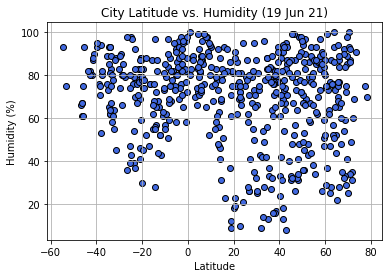

In [11]:
x_data = weather_df["Lat"]
hum_data = weather_df["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (19 Jun 21)")
plt.grid()
plt.scatter(x_data, hum_data, marker="o", facecolor="royalblue", edgecolor="black")
plt.savefig("output_data/lat_humidity.png", bbox_inches='tight');
plt.show()

## Latitude vs. Cloudiness Plot

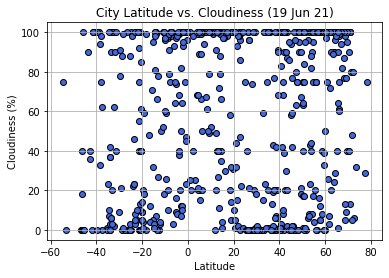

In [12]:
x_data = weather_df["Lat"]
cloud_data = weather_df["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (19 Jun 21)")
plt.grid()
plt.scatter(x_data, cloud_data, marker="o", facecolor="royalblue", edgecolor="black")
plt.savefig("output_data/lat_cloud.png", bbox_inches='tight');
plt.show()

## Latitude vs. Wind Speed Plot

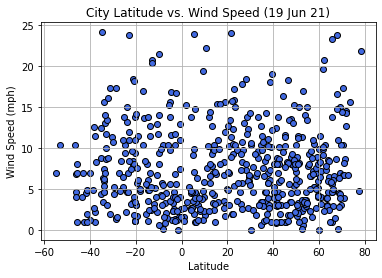

In [13]:
x_data = weather_df["Lat"]
wind_data = weather_df["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (19 Jun 21)")
plt.grid()
plt.scatter(x_data, wind_data, marker="o", facecolor="royalblue", edgecolor="black")
plt.savefig("output_data/lat_wind.png", bbox_inches='tight');
plt.show()

## Linear Regression

In [14]:
northern_df = weather_df.loc[weather_df["Lat"] >= 0, :]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Port Hawkesbury,45.6169,-61.3485,64.35,79,77,1.01,CA,1624067688
7,Barrow,71.2906,-156.7887,49.14,49,80,8.61,US,1624067691
8,Areosa,41.7178,-8.8571,60.31,91,8,8.77,PT,1624067692
10,Saskylakh,71.9167,114.0833,77.14,35,48,12.73,RU,1624067693
11,Tasiilaq,65.6145,-37.6368,29.44,70,1,4.61,GL,1624067694
...,...,...,...,...,...,...,...,...,...
562,Luga,58.7372,29.8453,60.28,85,8,5.01,RU,1624068092
563,Solnechnyy,50.7214,136.6319,65.89,53,100,8.03,RU,1624068093
564,Wanning,18.8003,110.3967,89.53,61,14,11.99,CN,1624067967
565,Oussouye,12.4850,-16.5469,77.70,79,49,6.53,SN,1624068094


In [15]:
southern_df = weather_df.loc[weather_df["Lat"] < 0, :]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,54.72,82,36,1.01,AU,1624067686
1,Rikitea,-23.1203,-134.9692,74.84,77,8,23.78,PF,1624067580
3,Alyangula,-13.8483,136.4192,76.87,57,100,11.50,AU,1624067688
4,Puerto Ayora,-0.7393,-90.3518,72.55,96,47,4.00,EC,1624067587
5,Punta Arenas,-53.1500,-70.9167,39.31,75,0,10.36,CL,1624067584
...,...,...,...,...,...,...,...,...,...
545,Kawalu,-7.3817,108.2082,78.31,82,100,0.89,ID,1624068081
549,Vila Velha,-20.3297,-40.2925,61.95,83,85,3.40,BR,1624068084
556,Nokaneng,-19.6667,22.2667,53.64,45,1,7.52,BW,1624068088
560,Chissamba,-12.1667,17.3333,50.43,52,4,2.71,AO,1624068091


In [16]:
def linear_regression(x_value, y_value, l1, l2, colour):
    correlation = st.pearsonr(x_value, y_value)
    print(f"The correlation coefficient between Latitude and Max temperature is {round(correlation[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress_value = x_value * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_equation,(l1, l2), fontsize=12, color="red")
    plt.scatter(x_value, y_value, marker="o", color=colour, edgecolor="black")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.68
The r-squared is: 0.45833723455571335


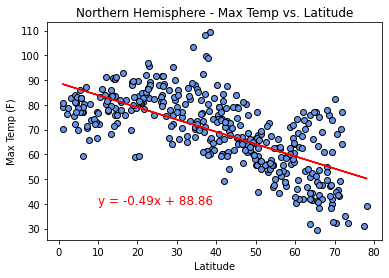

In [17]:
linear_regression(northern_df["Lat"], northern_df["Max Temp"], 10, 40, "cornflowerblue")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.savefig("output_data/northern_lat_temp.png", bbox_inches='tight');
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.76
The r-squared is: 0.5803921855780446


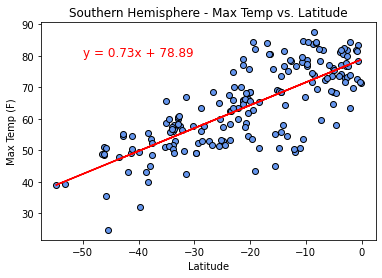

In [18]:
linear_regression(southern_df["Lat"], southern_df["Max Temp"], -50, 80, "cornflowerblue")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.savefig("output_data/southern_lat_temp.png", bbox_inches='tight');
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.08
The r-squared is: 0.00589350648550641


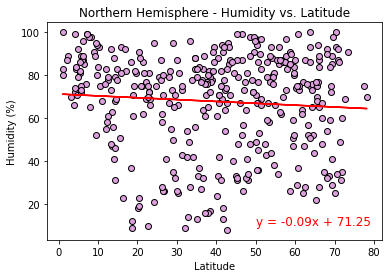

In [19]:
linear_regression(northern_df["Lat"], northern_df["Humidity"], 50, 10, "plum")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.savefig("output_data/northern_lat_humidity.png", bbox_inches='tight');
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.03
The r-squared is: 0.0010533058722499303


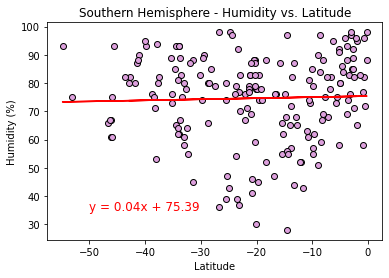

In [20]:
linear_regression(southern_df["Lat"], southern_df["Humidity"], -50, 35, "plum")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.savefig("output_data/southern_lat_humidity.png", bbox_inches='tight');
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.03
The r-squared is: 0.0010054105356838384


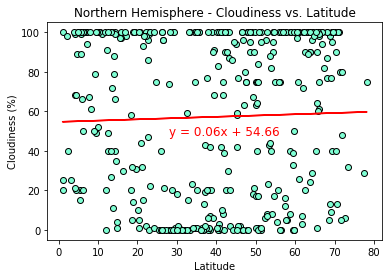

In [21]:
linear_regression(northern_df["Lat"], northern_df["Cloudiness"], 28, 48, "aquamarine")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.savefig("output_data/northern_lat_cloudiness.png", bbox_inches='tight');
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.21
The r-squared is: 0.04233927095792096


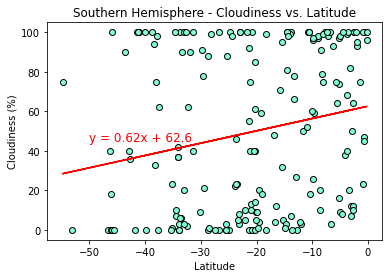

In [22]:
linear_regression(southern_df["Lat"], southern_df["Cloudiness"], -50, 45, "aquamarine")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.savefig("output_data/southern_lat_cloudiness.png", bbox_inches='tight');
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.04
The r-squared is: 0.001892955719630767


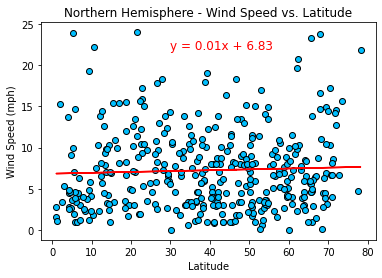

In [23]:
linear_regression(northern_df["Lat"], northern_df["Wind Speed"], 30, 22, "deepskyblue")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.savefig("output_data/northern_lat_windspeed.png", bbox_inches='tight');
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.05
The r-squared is: 0.0026628898723733566


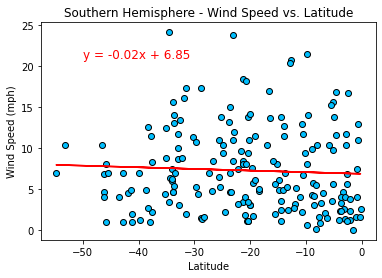

In [24]:
linear_regression(southern_df["Lat"], southern_df["Wind Speed"], -50, 21, "deepskyblue")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.savefig("output_data/southern_lat_windspeed.png", bbox_inches='tight');
plt.show()